<a href="https://colab.research.google.com/github/khaireddine-satouri/plant-dataset/blob/main/Projet_Deep_Learning_DeepLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# choix de nombre de lots et époques
EPOCHS = 100
VAL_SUBSPLITS = 5
BUFFER_SIZE = 390
BATCH_SIZE = 16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importation des packages requis

In [ ]:
import tensorflow as tf
import numpy as np
from keras.layers import Activation,Conv2D,MaxPooling2D,BatchNormalization
from keras.layers import Input,DepthwiseConv2D,add,Dropout,AveragePooling2D,Concatenate
from keras.models import Model
from tensorflow.keras.layers import *
from keras.utils import conv_utils
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
from keras import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread,imshow
from skimage.transform import resize
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Collection et stockage des données 

In [ ]:
original_images_train_path = '/content/drive/MyDrive/Projet_INFO0702/plant-disease/train/image'
original_images_test_path = '/content/drive/MyDrive/Projet_INFO0702/plant-disease/test/image'
mask_images_train_path = '/content/drive/MyDrive/Projet_INFO0702/plant-disease/train/label'
mask_images_test_path='/content/drive/MyDrive/Projet_INFO0702/plant-disease/test/label'

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
from skimage import io
import imageio 
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline 

train_image_list=[]
train_mask_list=[]
test_image_list=[]
test_mask_list=[]

In [ ]:
#parcourir la liste des images d'entrainement et les stockées dans une liste
from natsort import natsorted
sorted_train_images_path=[]
for directory_path in glob(original_images_train_path):
    for img_path in glob(os.path.join(directory_path, "*/*.jpg")):
      sorted_train_images_path.append(img_path)
#natsorted(sorted_train_images_path)

In [ ]:
#stockage des images d'entrainement dans une liste d'une facon triée
train_image_list=[]
for img in natsorted(sorted_train_images_path) :
  train_image_list.append(img)

In [ ]:
#parcourir la liste des masques d'images d'entrainement et les stockées dans une liste
from natsort import natsorted
sorted_train_masks_path=[]
for directory_path in glob(mask_images_train_path):
    for img_path in glob(os.path.join(directory_path, "*/*.png")):
      sorted_train_masks_path.append(img_path)
#natsorted(sorted_train_masks_path)

In [ ]:
#stockage des masques d'images d'entrainement dans une liste d'une facon triée
train_mask_list=[]
for img in natsorted(sorted_train_masks_path) :
  train_mask_list.append(img)

In [ ]:
#parcourir la liste d'images de test et les stockées dans une liste
from natsort import natsorted
sorted_test_images_path=[]
for directory_path in glob(original_images_test_path):
    for img_path in glob(os.path.join(directory_path, "*/*.jpg")):
      sorted_test_images_path.append(img_path)
#natsorted(sorted_test_images_path)

In [ ]:
#stockage d'imagesde test dans une liste d'une facon triée
test_image_list=[]
for img in natsorted(sorted_test_images_path) :
  test_image_list.append(img)

In [ ]:
#parcourir la liste des masques d'images de test et les stockées dans une liste
from natsort import natsorted
sorted_test_masks_path=[]
for directory_path in glob(mask_images_test_path):
    for img_path in glob(os.path.join(directory_path, "*/*.png")):
      sorted_test_masks_path.append(img_path)
#natsorted(sorted_test_masks_path)

In [ ]:
#stockage des masques d'images de test dans une liste d'une facon triée
test_mask_list=[]
for img in natsorted(sorted_test_masks_path) :
  test_mask_list.append(img)

(270, 270, 3)
(270, 270, 4)


Text(0.5, 1.0, 'Mask')

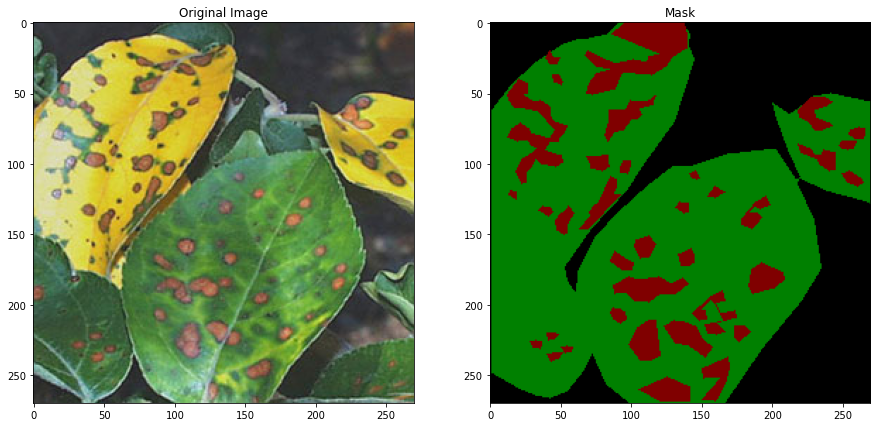

In [ ]:
#verification de l'exactitude des images stockées
n = 10 # you can chose any index 
img  = imageio.imread(train_image_list[n])
print(img.shape)
mask = imageio.imread(train_mask_list[n])
print(mask.shape)

# now let's plot 
fig ,arr  = plt.subplots(1,2,figsize=(15,10))
arr[0].imshow(img)
arr[0].set_title('Original Image')
arr[1].imshow(mask)
arr[1].set_title('Mask')

# Préparation des données pour l'entrainement

In [ ]:
train_images = tf.constant(train_image_list)
train_masks = tf.constant(train_mask_list)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_masks))
for image,mask in train_dataset.take(1) : 
    print(image)
    print(mask)
    
test_images = tf.constant(test_image_list)
test_masks = tf.constant(test_mask_list)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_masks))
for image,mask in test_dataset.take(1) : 
    print(image)
    print(mask)

tf.Tensor(b'/content/drive/MyDrive/Projet_INFO0702/plant-disease/train/image/Apple_Rust/train_Apple_Rust_3.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/Projet_INFO0702/plant-disease/train/label/Apple_Rust/train_Apple_Rust_3_label.png', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/Projet_INFO0702/plant-disease/test/image/Apple_Rust/test_Apple_Rust_1.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/Projet_INFO0702/plant-disease/test/label/Apple_Rust/test_Apple_Rust_1_label.png', shape=(), dtype=string)


In [ ]:
def process_path(image_path,mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32) #cela revient à diviser par 255 pour définir les valeurs entre 0 et 1 (normalisation)
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask,channels=1)
    mask = tf.math.reduce_max(mask,axis=-1,keepdims=True)
    return img , mask

def preprocess(image,mask) : 
    input_image = tf.image.resize(image,(256,256),method='nearest')
    input_mask = tf.image.resize(mask,(256,256),method='nearest')
    
    return input_image , input_mask

train_image_ds = train_dataset.map(process_path) # appliquer la fonction preprocess_path à notre train_dataset
print(train_image_ds)
train_processed_image_ds = train_image_ds.map(preprocess) # appliquer la fonction preprocess_path à notre train_dataset

test_image_ds = test_dataset.map(process_path) # appliquer la fonction preprocess_path à notre test_dataset
print(train_image_ds)
test_processed_image_ds = test_image_ds.map(preprocess) 

<MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>


# Conception de modèle DeepLab

In [ ]:
def convolution_block(block_input, num_filters=256, kernel_size=3, dilation_rate=1, padding="same", use_bias=False):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=tf.keras.initializers.HeNormal(),
        )(block_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [ ]:
def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [ ]:
def DeeplabV3(image_size, num_classes):
    model_input = tf.keras.Input(shape=(image_size, image_size, 3))
    resnet50 = tf.keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    model = tf.keras.Model(inputs=model_input, outputs=model_output)
    
    return model

# Entrainement du modèle 

In [ ]:
#réglage des parametres et appel du modèle
img_height = 256
img_width = 256
num_channels = 3
filters = 32
n_classes = 100

model = DeeplabV3(img_height, n_classes)
#model.summary()

94765736/94765736 [==============================] - 7s 0us/step


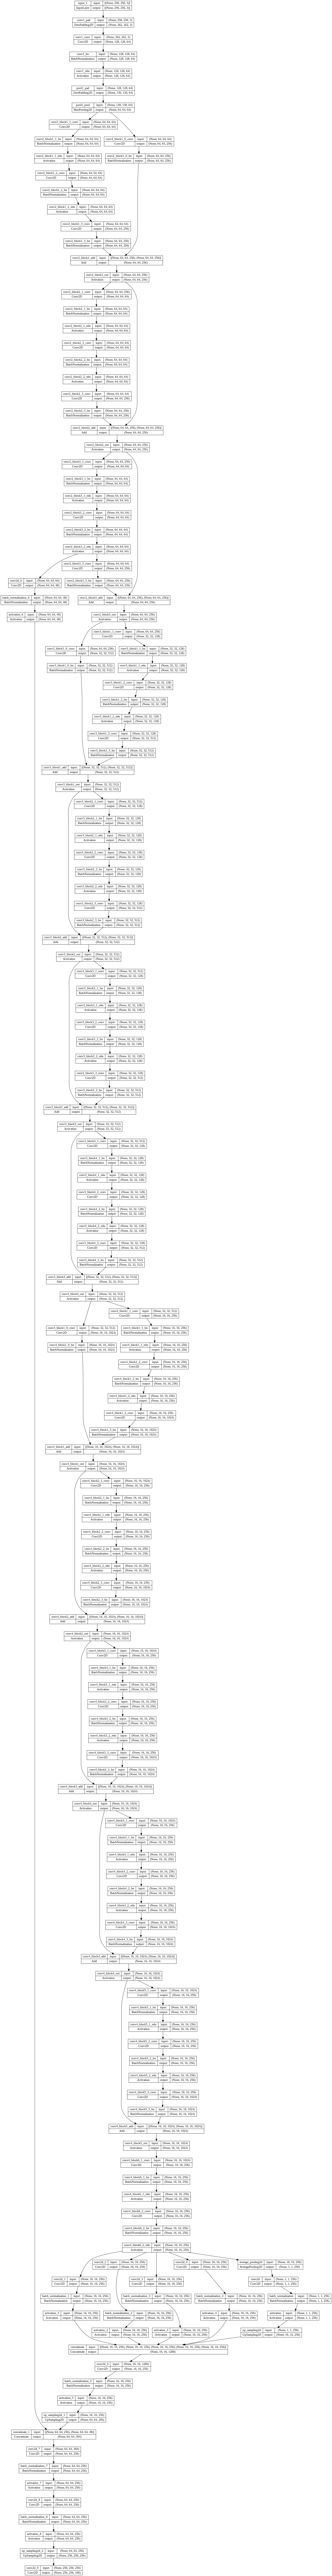

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compilation du modèle
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
# train
train_processed_image_ds.batch(BATCH_SIZE)
train_dataset = train_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_processed_image_ds.element_spec)

# test
test_processed_image_ds.batch(BATCH_SIZE)
test_dataset = test_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(test_processed_image_ds.element_spec)

(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(256, 256, 1), dtype=tf.uint8, name=None))
(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(256, 256, 1), dtype=tf.uint8, name=None))


In [ ]:
#phase d'entrainement
history = model.fit(train_dataset, 
                    epochs = EPOCHS
                    )

Epoch 1/100
29/29 [==============================] - 325s 1s/step - loss: 1.5881 - accuracy: 0.6990
Epoch 2/100
29/29 [==============================] - 13s 436ms/step - loss: 0.5848 - accuracy: 0.7968
Epoch 3/100
29/29 [==============================] - 13s 440ms/step - loss: 0.4752 - accuracy: 0.8197
Epoch 4/100
29/29 [==============================] - 13s 438ms/step - loss: 0.4353 - accuracy: 0.8351
Epoch 5/100
29/29 [==============================] - 13s 435ms/step - loss: 0.3647 - accuracy: 0.8598
Epoch 6/100
29/29 [==============================] - 13s 438ms/step - loss: 0.3466 - accuracy: 0.8650
Epoch 7/100
29/29 [==============================] - 13s 437ms/step - loss: 0.3811 - accuracy: 0.8516
Epoch 8/100
29/29 [==============================] - 13s 434ms/step - loss: 0.3518 - accuracy: 0.8659
Epoch 9/100
29/29 [==============================] - 13s 438ms/step - loss: 0.2923 - accuracy: 0.8876
Epoch 10/100
29/29 [==============================] - 13s 441ms/step - loss: 0.2755 

# Evaluation du modèle

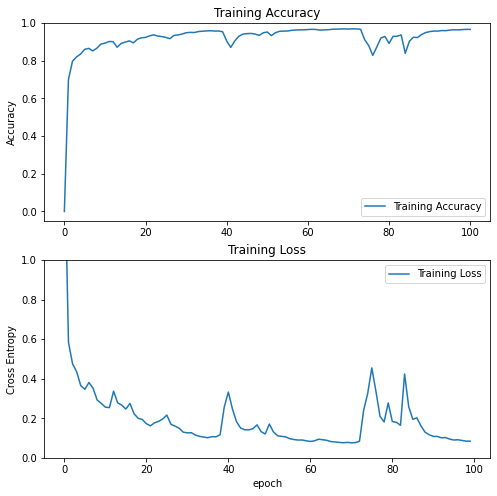

In [ ]:
#visualisation de la progression de la précision
acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#sauvegardé le modéle après l'entrainement
model.save('DeepLab.h5')

In [ ]:
#bilan de la précision générale du modéle
train_loss, train_accuracy = model.evaluate(train_dataset, batch_size = 16)

29/29 [==============================] - 6s 160ms/step - loss: 0.0821 - accuracy: 0.9665


# Prédire les segmentations d'images à l'aide du modèle entraîné

In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

----- training_dataset results---------
1/1 [==============================] - 0s 29ms/step


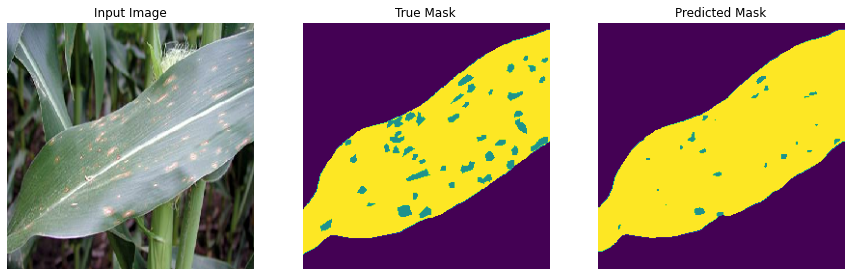

1/1 [==============================] - 0s 30ms/step


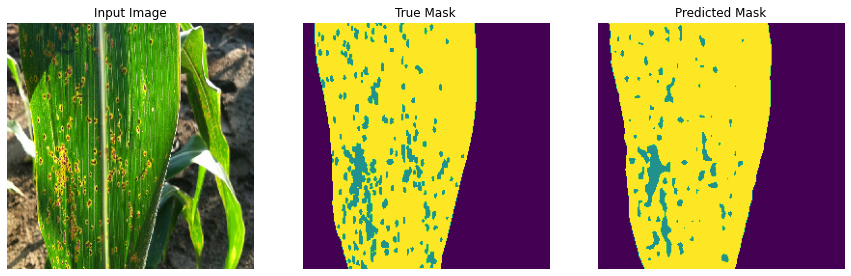

1/1 [==============================] - 0s 50ms/step


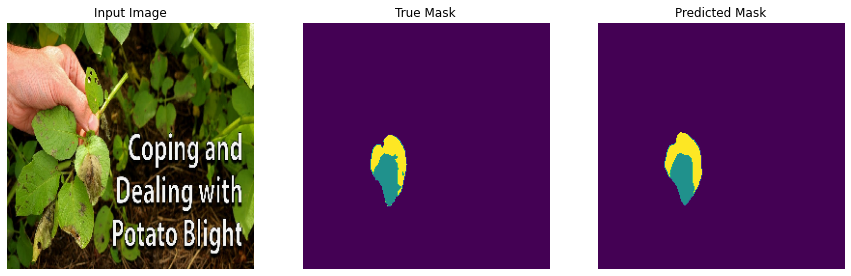

1/1 [==============================] - 0s 107ms/step


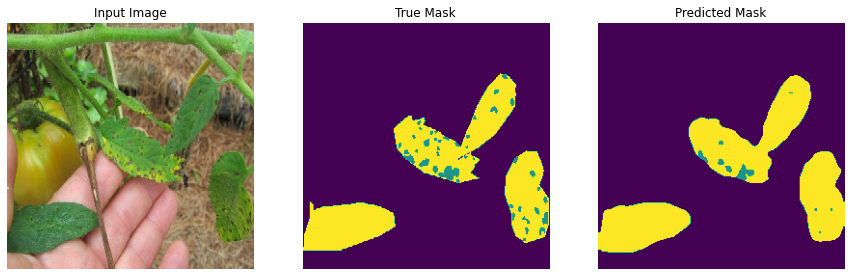

1/1 [==============================] - 0s 29ms/step


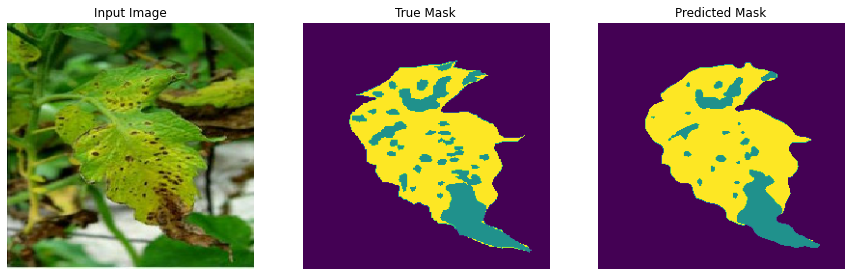

1/1 [==============================] - 0s 34ms/step


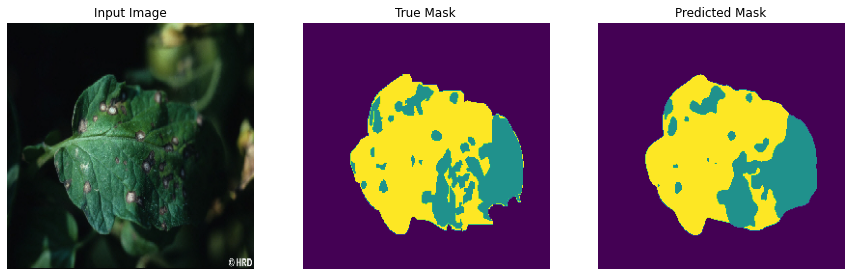

----- test_dataset results---------
1/1 [==============================] - 0s 29ms/step


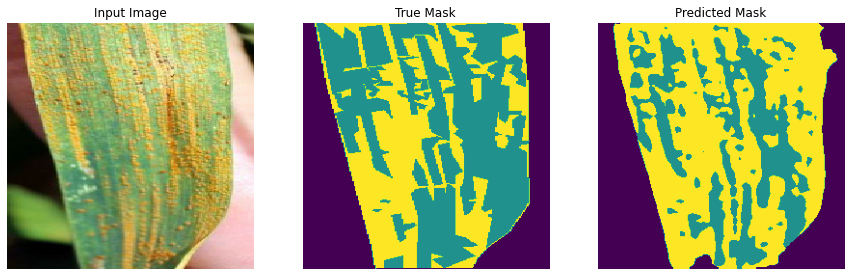

1/1 [==============================] - 0s 33ms/step


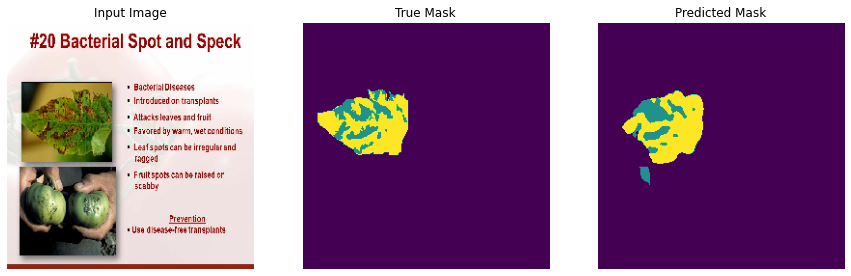

1/1 [==============================] - 0s 30ms/step


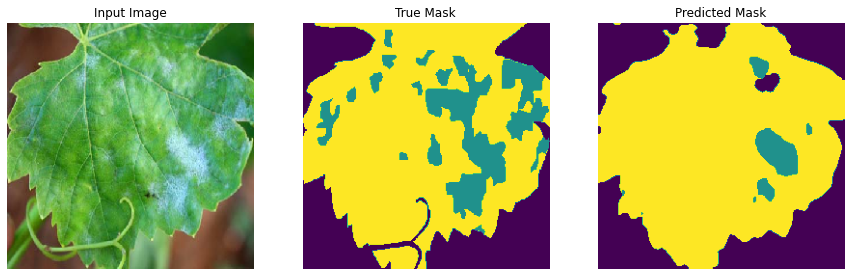

1/1 [==============================] - 0s 27ms/step


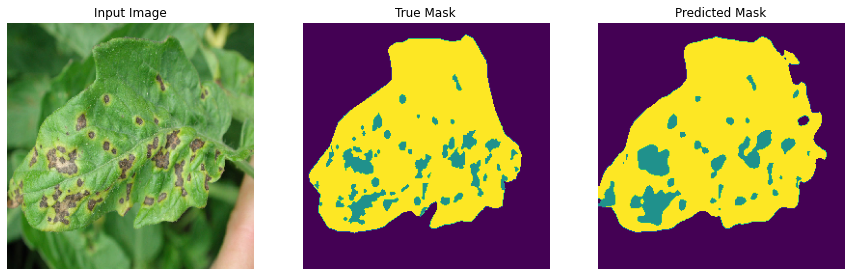

In [ ]:
print("----- training_dataset results---------")
show_predictions(train_dataset, 6)
print("----- test_dataset results---------")
show_predictions(test_dataset, 6)

In [ ]:
# évaluation du modéle
print("DeepLab Model Evaluation: ")
model.evaluate(test_dataset)

DeepLab Model Evaluation: 
4/4 [==============================] - 1s 130ms/step - loss: 0.5279 - accuracy: 0.8695


[0.5279430747032166, 0.8694730997085571]